# Introduction
 This is a note book for analyse the data from quadrant diode

In [1]:
####### Always run this block before run other blocks   #######
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import os
# some constants:
DARK_NOISE = [2276,2315,2225,2229]
X_NOMINAL,Y_NOMINAL = 1770,1770
DRIFT = [X_NOMINAL,Y_NOMINAL].extend(DARK_NOISE)

# Piezo hysterisi impact anlyse
Data at a set point no moving compare with Data collected by moving away from that point and come back many times

## Compare in X

In [2]:
############ Load data  on X ##############
# load jump data
x_jump_path = "2 jump points\\adc_setpoints_18m_x_axis_min_max_loop.csv" #this data file, x jump around, y stay in min
xmin_jump=[]
xmax_jump=[]
for row in np.loadtxt(x_jump_path, delimiter=",", skiprows=1,usecols=(0,2,3,4,5))-np.array([[0]+DARK_NOISE]):
    if row[0]==184:
        xmin_jump.append(row[1:5])
    elif row[0]==3357:
        xmax_jump.append(row[1:5])
xmin_jump = np.array(xmin_jump)
xmax_jump = np.array(xmax_jump)
# load no jump data
min_no_jump_path = "2 points NO jump\\18m_min_x_y_value_live.csv"
xmin_no_jump=np.loadtxt(min_no_jump_path, delimiter=",", skiprows=100,usecols=(2,3,4,5),max_rows=100)-np.array(DARK_NOISE) ## load the same number of jump samples(100)
xmax_no_jump=np.loadtxt("2 points NO jump\\18m_max_x_value_live.csv", delimiter=",", skiprows=100,usecols=(2,3,4,5),max_rows=100)-np.array(DARK_NOISE)  # This file (xmax,ymin)

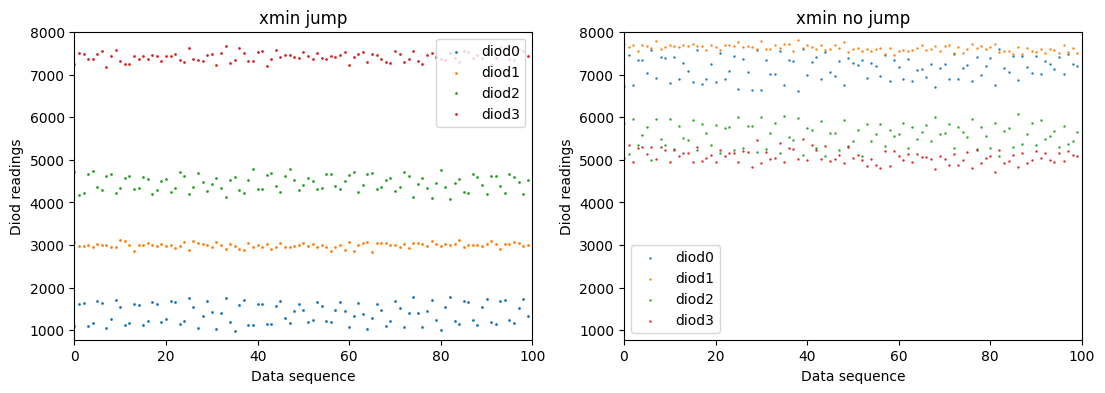

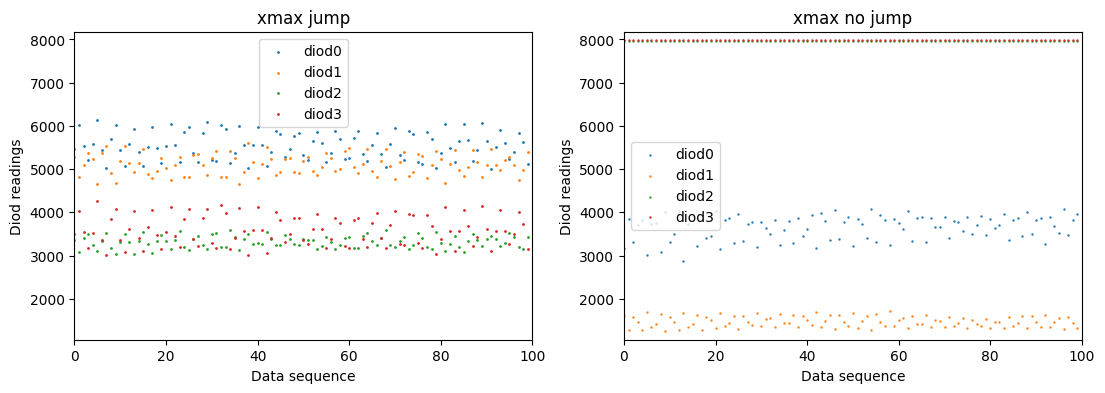

In [3]:
####### plots for compare #########
plt.figure(figsize=(13,4))
# compare xmin (jump & no jump)
plt.subplot(1,2,1)
for i in range(4):
    plt.scatter(range(len(xmin_jump)),xmin_jump[:,i],s=1,label=f"diod{i}")
plt.axis([0,len(xmin_jump),min(xmin_jump.min(),xmin_no_jump.min())-200,max(xmin_jump.max(),xmin_no_jump.max())+200])
plt.xlabel("Data sequence")
plt.ylabel("Diod readings")
plt.legend()
plt.title("xmin jump")
plt.subplot(1,2,2)
for i in range(4):
    plt.scatter(range(len(xmin_no_jump)),xmin_no_jump[:,i],s=0.5,label=f"diod{i}")
plt.axis([0,len(xmin_jump),min(xmin_jump.min(),xmin_no_jump.min())-200,max(xmin_jump.max(),xmin_no_jump.max())+200])
plt.xlabel("Data sequence")
plt.ylabel("Diod readings")
plt.legend()
plt.title('xmin no jump')
plt.show()
# compare xmax (jump&no jump)
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
for i in range(4):
    plt.scatter(range(len(xmax_jump)),xmax_jump[:,i],s=1,label=f"diod{i}")
plt.axis([0,len(xmax_jump),min(xmax_jump.min(),xmax_no_jump.min())-200,max(xmax_jump.max(),xmax_no_jump.max())+200])
plt.xlabel("Data sequence")
plt.ylabel("Diod readings")
plt.legend()
plt.title("xmax jump")
plt.subplot(1,2,2)
for i in range(4):
    plt.scatter(range(len(xmax_no_jump)),xmax_no_jump[:,i],s=0.5,label=f"diod{i}")
plt.axis([0,len(xmax_jump),min(xmax_jump.min(),xmax_no_jump.min())-200,max(xmax_jump.max(),xmax_no_jump.max())+200])
plt.xlabel("Data sequence")
plt.ylabel("Diod readings")
plt.legend()
plt.title('xmax no jump')
plt.show()

In [4]:
## Some stats
# compare on Xmin (jump and no jump)
xmin_jump_stat = np.array([(xmin_jump[:,i].mean(),xmin_jump[:,i].std(),xmin_jump[:,i].std()/xmin_jump[:,i].mean()) for i in range(4)],dtype='float16')
xmin_no_jump_stat = np.array([(xmin_no_jump[:,i].mean(),xmin_no_jump[:,i].std(),xmin_no_jump[:,i].std()/xmin_no_jump[:,i].mean()) for i in range(4)],dtype='float16')
np.set_printoptions(precision=4, suppress=True)
print("Xmin data Mean value of 4 diods (jump, no jump)")
for i in range(4):
    print(f"diod {i+1}: {xmin_jump_stat[i,0]} || {xmin_no_jump_stat[i,0]}")
print("Xmin data standard deviation of 4 diods (jump, no jump)")
for i in range(4):
    print(f"diod {i+1}: {xmin_jump_stat[i,1]} || {xmin_no_jump_stat[i,1]}")
print("Xmin data std/mean of 4 diods (jump, no jump)")
for i in range(4):
    print(f"diod {i+1}: {xmin_jump_stat[i,2]:.3f} || {xmin_no_jump_stat[i,2]:.3f}")


Xmin data Mean value of 4 diods (jump, no jump)
diod 1: 1399.0 || 7152.0
diod 2: 2998.0 || 7628.0
diod 3: 4456.0 || 5588.0
diod 4: 7420.0 || 5084.0
Xmin data standard deviation of 4 diods (jump, no jump)
diod 1: 240.625 || 263.0
diod 2: 57.46875 || 74.0625
diod 3: 183.0 || 272.75
diod 4: 109.0 || 155.375
Xmin data std/mean of 4 diods (jump, no jump)
diod 1: 0.172 || 0.037
diod 2: 0.019 || 0.010
diod 3: 0.041 || 0.049
diod 4: 0.015 || 0.031


## Compare in Y (need ymin ymax jump data to compare)

In [5]:
############ Load Data  on Y ##############
# load jump data   ##  WAITING FOR THIS
ymin_jump=[]
ymax_jump=[]
# load no jump data
min_no_jump_path = "2 points NO jump\\18m_min_x_y_value_live.csv"
ymin_no_jump=np.loadtxt(min_no_jump_path, delimiter=",", skiprows=1,usecols=(2,3,4,5))
ymax_no_jump=np.loadtxt("2 points NO jump\\18m_max_y_value_live.csv", delimiter=",", skiprows=1,usecols=(2,3,4,5))


# Move along one axis

In [6]:
##### Load data   #####
# load X axis move data
#15%power
## 20 points
x_40_points_1 = np.loadtxt("move on one axis\\18m_40_points_x_axis_#1.csv",delimiter=',',skiprows=1,usecols=(0,2,3,4,5))-np.array([3950]+DARK_NOISE)
## 40 points  ## WAIT
x_40_points_2 = np.loadtxt("move on one axis\\18m_40_points_x_axis_#2.csv",delimiter=',',skiprows=1,usecols=(0,2,3,4,5))-np.array([0]+DARK_NOISE)
#load Y aixs move data ## WAIT
#### This data shows while y moving, diod reading is not moving
y_20_points = np.loadtxt("move on one axis\\adc_setpoints_18m_y_axis_20_point_plot.csv",delimiter=',',skiprows=1,usecols=(1,2,3,4,5))
## 40 points ## WAIT/
#### steps move from ymin to ymax  loops has done in 18/12 but still no relation between diod readings and moving

Text(0.5, 1.0, 'move along x axis 40 steps from min to max(test2)')

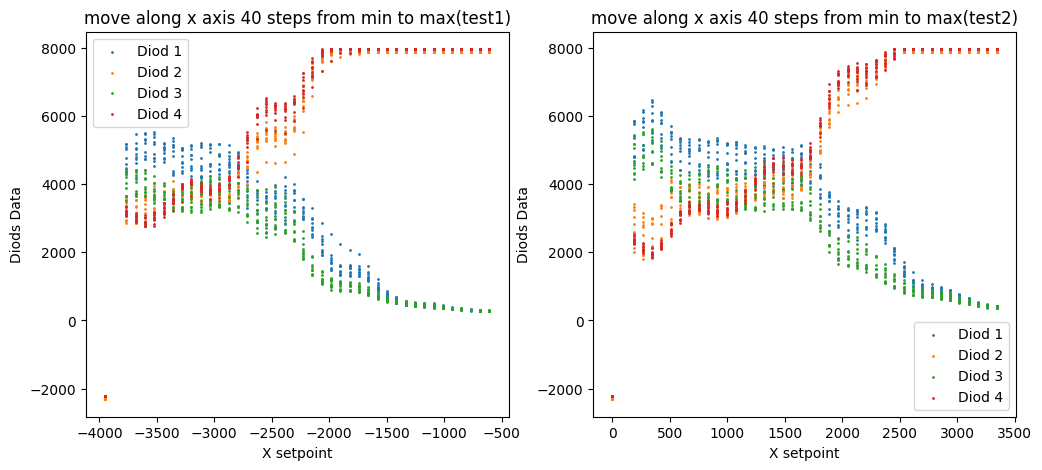

In [7]:
# PLOTs
# move along x axis 20 steps from min to max
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for i in range(1,5):
    plt.scatter(x_40_points_1[:,0],x_40_points_1[:,i],s=1,label=f"Diod {i}")
plt.legend()
plt.xlabel("X setpoint")
plt.ylabel("Diods Data")
plt.title("move along x axis 40 steps from min to max(test1)")

plt.subplot(1,2,2)
for i in range(1,5):
    plt.scatter(x_40_points_2[:,0],x_40_points_2[:,i],s=1,label=f"Diod {i}")
plt.legend()
plt.xlabel("X setpoint")
plt.ylabel("Diods Data")
plt.title("move along x axis 40 steps from min to max(test2)")

In [8]:
max(x_40_points_1[:,i].all() for i in range(1,5))

np.True_

## Midway turning
The midway running just shows noisy data, but could be the setup wans't right while testing

Text(0.5, 1.0, 'move along x axis 40 steps from min to max(test2)')

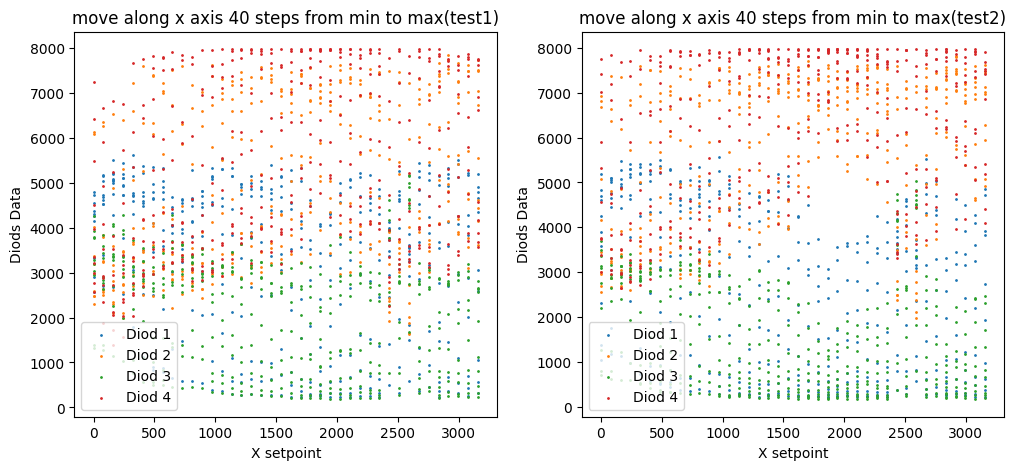

In [9]:
x_mid_max_1 = np.loadtxt("move on one axis\\18m_40_points_x_axis_halfway_#1.csv",delimiter=',',skiprows=1,usecols=(0,2,3,4,5))-np.array([1770]+DARK_NOISE)
x_mid_max_2 = np.loadtxt("move on one axis\\18m_40_points_x_axis_halfway_#2.csv",delimiter=',',skiprows=1,usecols=(0,2,3,4,5))-np.array([1770]+DARK_NOISE)
# PLOTs
# move along x axis 20 steps from min to max
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for i in range(1,5):
    plt.scatter(x_mid_max_1[:,0],x_mid_max_1[:,i],s=1,label=f"Diod {i}")
plt.legend()
plt.xlabel("X setpoint")
plt.ylabel("Diods Data")
plt.title("move along x axis 40 steps from min to max(test1)")

plt.subplot(1,2,2)
for i in range(1,5):
    plt.scatter(x_mid_max_2[:,0],x_mid_max_2[:,i],s=1,label=f"Diod {i}")
plt.legend()
plt.xlabel("X setpoint")
plt.ylabel("Diods Data")
plt.title("move along x axis 40 steps from min to max(test2)")

# This is for trouble shooting the y axis data not changing issue


## This is sets of testing done on swapped x,y acuater and run on "y_axis_min_max.elf"

In [ ]:
##### Load data   #####
# load X axis move data
#15%power
test_path = 'swap_y_tests'
for file_name in os.listdir(test_path):
    swap_y_tests = np.loadtxt(os.path.join(test_path,file_name),delimiter=',',skiprows=1,usecols=(1,2,3,4,5),max_rows=400)

    plt.figure(figsize=(6,4))  
    for i in range(1,5):
        plt.scatter(swap_y_tests[:,0],swap_y_tests[:,i],s=1,label=f"Diod {i}")
    plt.legend()
    plt.xlabel("X setpoint")
    plt.ylabel("Diods Data")
    plt.title("move along x axis 40 steps from min to max(test1)")
    plt.show()


## This test done on actuating x axis(before swapping)

In [ ]:
##### Load data   #####
# load X axis move data
#15%power
last_test_path = 'ocs_testing'
for file_name in os.listdir(last_test_path):
    print(file_name)
    if file_name.startswith('x') and file_name.endswith('.csv'):
        print('x')
        x_tests = np.loadtxt(os.path.join(last_test_path,file_name),delimiter=',',skiprows=1,usecols=(0,2,3,4,5),max_rows=400)

        plt.figure(figsize=(6,4))

        for i in range(1,5):
            plt.scatter(x_tests[:,0],x_tests[:,i],s=1,label=f"Diod {i}")
        plt.legend()
        plt.xlabel("X setpoint")
        plt.ylabel("Diods Data")
        plt.title("move along x axis 40 steps from min to max(test1)")
        plt.show()
    if file_name.startswith('y') and file_name.endswith('.csv'):
        y_tests = np.loadtxt(os.path.join(last_test_path,file_name),delimiter=',',skiprows=1,usecols=(1,2,3,4,5),max_rows=400)

        plt.figure(figsize=(6,4))

        for i in range(1,5):
            plt.scatter(y_tests[:,0],y_tests[:,i],s=1,label=f"Diod {i}")
        plt.legend()
        plt.xlabel("Y setpoint")
        plt.ylabel("Diods Data")
        plt.title("move along x axis 40 steps from min to max(test1)")
        plt.show()


In [ ]:
##### Load data   #####
# load X axis move data
#15%power
last_test_path = 'new_test_xy'
for file_name in os.listdir(last_test_path):
    print(file_name)
    if file_name.startswith('x') and file_name.endswith('.csv'):
        print('x')
        x_tests = np.loadtxt(os.path.join(last_test_path,file_name),delimiter=',',skiprows=1,usecols=(0,2,3,4,5),max_rows=400)

        plt.figure(figsize=(6,4))

        for i in range(1,5):
            plt.scatter(x_tests[:,0],x_tests[:,i],s=1,label=f"Diod {i}")
        plt.legend()
        plt.xlabel("X setpoint")
        plt.ylabel("Diods Data")
        plt.title("move along x axis 40 steps from min to max(test1)")
        plt.show()
    if file_name.startswith('y') and file_name.endswith('.csv'):
        y_tests = np.loadtxt(os.path.join(last_test_path,file_name),delimiter=',',skiprows=1,usecols=(1,2,3,4,5),max_rows=400)

        plt.figure(figsize=(6,4))

        for i in range(1,5):
            plt.scatter(y_tests[:,0],y_tests[:,i],s=1,label=f"Diod {i}")
        plt.legend()
        plt.xlabel("Y setpoint")
        plt.ylabel("Diods Data")
        plt.title("move along x axis 40 steps from min to max(test1)")
        plt.show()


# Analyse data after piezo issue reolved

hilbert scan1.csv
hilbert scan2.csv
hilbert_new_4.csv
hilbert_new_5.csv
hilbert_new_6.csv


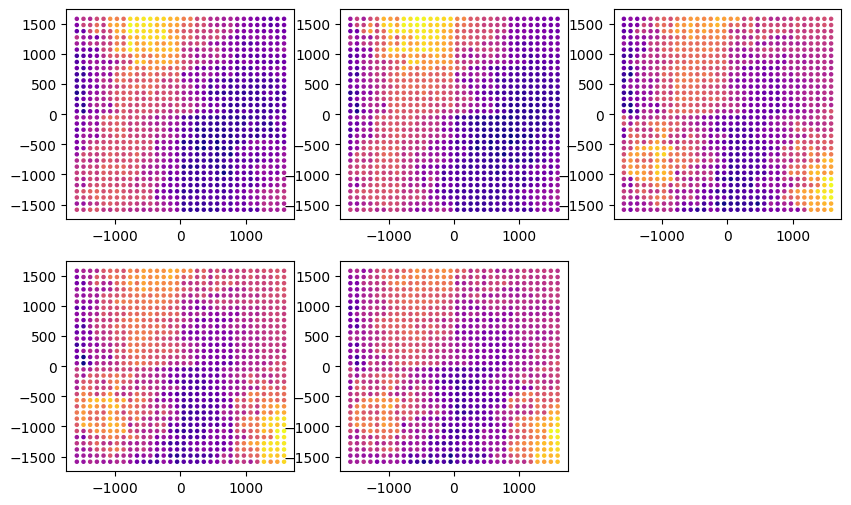

In [10]:
new_hilbert_path = "new_hilberts"
plt.figure(figsize=(10,6))
# plt.title("hilber scan")
i = 0
for file in os.listdir(new_hilbert_path):
    i+=1
    print(file)
    hilbert = np.loadtxt(os.path.join(new_hilbert_path,file),delimiter=',',skiprows=1,usecols=(0,1,2,3,4,5),max_rows=1024,)
    plt.subplot(2,3,i)
    plt.scatter(hilbert[:,0]-1770,hilbert[:,1]-1770,c=hilbert[:,3],cmap="plasma",s=5)

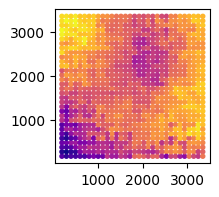

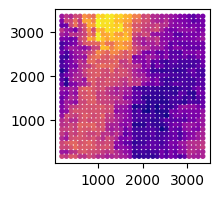

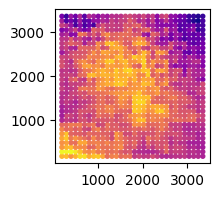

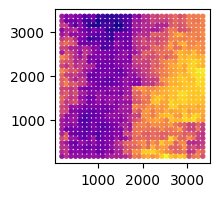

In [11]:
# open one hilbert scan data and stich all 4 diods together
path_hil = "new_hilberts\\hilbert scan1.csv"
hil_data = np.loadtxt(path_hil,delimiter=',',skiprows=1,usecols=(0,1,2,3,4,5),max_rows=1024)

plot_idx = 0
for i in range(2,6):
    plot_idx+=1
    plt.figure(figsize=(2,2))
    plt.scatter(hil_data[:,0],hil_data[:,1],c=hil_data[:,i],cmap="plasma",s=8)
    
    

In [ ]:
3357-184



[[  184.   184.  4322.]
 [  184.   286.  4238.]
 [  286.   286.  4203.]
 ...
 [   81. -2887.  4819.]
 [  184. -2887.  4764.]
 [  184. -2989.  4718.]]


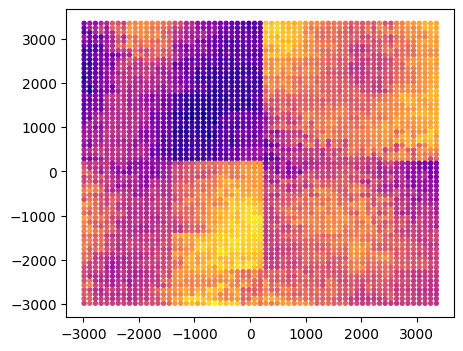

In [12]:
diod_order = [[0,0,0],[-3173,0,0],[0,-3173,0],[-3173,-3173,0]]
all_diods = np.vstack([hil_data[:,[0,1,i]]+diod_order[i-2] for i in range(2,6)])
plt.figure(figsize=(5,4))
plt.scatter(all_diods[:,0],all_diods[:,1],c=all_diods[:,2],s=8,cmap='plasma')
print(all_diods)

ValueError: Argument Z must be 2-dimensional.

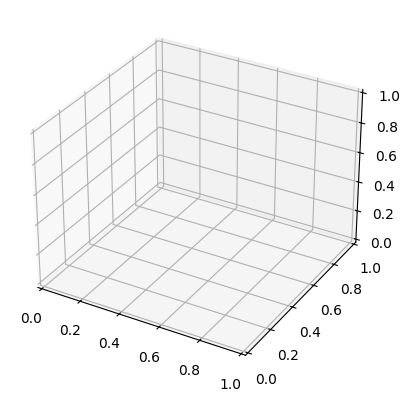

In [13]:
# Create plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(hil_data[:,0], hil_data[:,1], hil_data[:,2], cmap='viridis')

# Add color bar
fig.colorbar(surf)


# Show plot

plt.show()

In [25]:
import plotly.graph_objects as go

C:\Users\dilna\AppData\Local\Temp\ipykernel_120192\2660975571.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


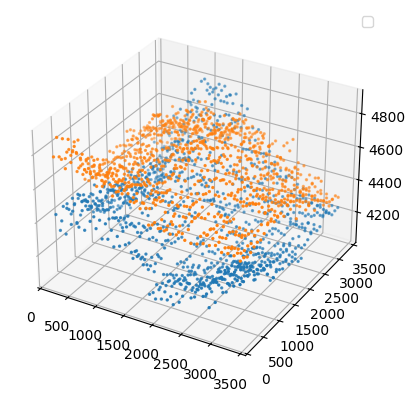

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hil_data[:,0],hil_data[:,1],hil_data[:,3],s=2)
ax.scatter(hil_data[:,0],hil_data[:,1],hil_data[:,4],s=2)
ax.legend()
plt.show()

In [27]:
from scipy.interpolate import griddata

# Scattered data
x = np.random.rand(100) * 10
y = np.random.rand(100) * 10
z = np.sin(np.sqrt(x**2 + y**2))

grid_x, grid_y = np.linspace(min(x), max(x), 32), np.linspace(min(y), max(y), 32)
grid_X, grid_Y = np.meshgrid(grid_x, grid_y)

# Interpolate z values onto the grid
grid_Z = griddata((x, y), z, (grid_X, grid_Y), method='cubic')

# Create the surface plot
fig = go.Figure(data=[go.Surface(z=grid_Z, x=grid_x, y=grid_y, colorscale='Viridis')])

# Customize layout
fig.update_layout(
    title='Surface Plot from Hilbert Scan Data',
    scene=dict(
        xaxis_title='X-axis',
        yaxis_title='Y-axis',
        zaxis_title='Value'
    ),
    margin=dict(l=0, r=0, t=40, b=0)
)




In [22]:
y

array([184., 286., 286., ..., 286., 286., 184.])

In [28]:
from scipy.interpolate import griddata

# Scattered data
x = np.random.rand(100) * 10
y = np.random.rand(100) * 10
z = np.sin(np.sqrt(x**2 + y**2))

grid_x, grid_y = np.linspace(min(x), max(x), 32), np.linspace(min(y), max(y), 32)
grid_X, grid_Y = np.meshgrid(grid_x, grid_y)

# Interpolate z values onto the grid
grid_Z = griddata((x, y), z, (grid_X, grid_Y), method='cubic')

# Create the surface plot
fig = go.Figure(data=[go.Surface(z=grid_Z, x=grid_x, y=grid_y, colorscale='Viridis')])

# Customize layout
fig.update_layout(
    title='Surface Plot from Hilbert Scan Data',
    scene=dict(
        xaxis_title='X-axis',
        yaxis_title='Y-axis',
        zaxis_title='Value'
    ),
    margin=dict(l=0, r=0, t=40, b=0)
)




In [31]:
import plotly.graph_objects as go
import numpy as np
from scipy.interpolate import griddata

# Example irregular data
x = np.random.rand(100) * 10 - 5
y = np.random.rand(100) * 10 - 5
z = np.sin(np.sqrt(x**2 + y**2))

# Create a regular grid
grid_x, grid_y = np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100)
grid_X, grid_Y = np.meshgrid(grid_x, grid_y)

# Interpolate data
grid_Z = griddata((x, y), z, (grid_X, grid_Y), method='cubic')

# Create the surface plot
fig = go.Figure(data=[go.Surface(z=grid_Z, x=grid_x, y=grid_y, colorscale='Viridis')])

# Customize layout
fig.update_layout(
    title='Interactive 3D Surface Plot',
    scene=dict(
        xaxis_title='X-axis',
        yaxis_title='Y-axis',
        zaxis_title='Z-axis'
    ),
    margin=dict(l=0, r=0, t=40, b=0)
)

# Show plot
fig.show()
